In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
LDS3folder = 'E:\Data Science\Mathematics and Statistics for Data Science\Excercise'
folder = LDS3folder + '/Data/B2/'

## a) Đọc tập tin iris vào dataframe
iris = pd.read_csv(folder + 'iris2.csv')
print('\n*** a) Dataframe iris.csv:')
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
print('         - Ma trận iris', iris.shape, ':')
print('                    ', iris.head())
print('         - Ma trận X', X.shape, ':')
print('         - 4 cột đầu tiên:\n', X.head())


*** a) Dataframe iris.csv:
         - Ma trận iris (150, 5) :
                        sepal_width  sepal_length  petal_length  petal_width species
0          3.5           5.1           1.4          0.2  setosa
1          3.0           4.9           1.4          0.2  setosa
2          3.2           4.7           1.3          0.2  setosa
3          3.1           4.6           1.5          0.2  setosa
4          3.6           5.0           1.4          0.2  setosa
         - Ma trận X (150, 4) :
         - 4 cột đầu tiên:
    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [3]:
## b) Phân tích SVD: U, s, VT
U, s, VT = np.linalg.svd(X)

print('\n*** b) Phân tích SVD:')
print('         - Ma trận U', U.shape, ':\n', U)
print('         - Eigenvalues:', s)
print('         - Ma trận VT', VT.shape, ':\n', VT)



*** b) Phân tích SVD:
         - Ma trận U (150, 150) :
 [[-6.16171172e-02  1.29969428e-01 -5.58364155e-05 ... -9.34637342e-02
  -9.60224157e-02 -8.09922905e-02]
 [-5.80722977e-02  1.11371452e-01  6.84386629e-02 ...  3.66755322e-02
  -3.24463474e-02  1.27273399e-02]
 [-5.67633852e-02  1.18294769e-01  2.31062793e-03 ...  3.08252776e-02
   1.95234663e-01  1.35567696e-01]
 ...
 [-9.40702260e-02 -4.98348018e-02 -4.14958083e-02 ...  9.81822841e-01
  -2.17978813e-02 -8.85972146e-03]
 [-9.48993908e-02 -5.62107520e-02 -2.12386574e-01 ... -2.14264126e-02
   9.42038920e-01 -2.96933496e-02]
 [-8.84882764e-02 -5.16210172e-02 -9.51442925e-02 ... -8.52768485e-03
  -3.02139863e-02  9.73577349e-01]]
         - Eigenvalues: [95.95066751 17.72295328  3.46929666  1.87891236]
         - Ma trận VT (4, 4) :
 [[-0.75116805 -0.37978837 -0.51315094 -0.16787934]
 [ 0.28583096  0.54488976 -0.70889874 -0.34475845]
 [ 0.49942378 -0.67502499 -0.05471983 -0.54029889]
 [ 0.32345496 -0.32124324 -0.48077482  0.749022

In [4]:
## c) Giảm chiều còn 2 components
if (X.shape[0] == X.shape[1]):
    S = np.diag(s)
else:
    S = np.zeros_like(X)
    S[:X.shape[1], :X.shape[1]] = np.diag(s)

print('\n*** c) NEW dataframe (using only the first two components):')
## Chỉ sử dụng 2 components: S(n,  2); VT(2, n)
n_components = 2
S = S[:, :n_components]
VT = VT[:n_components, :]


*** c) NEW dataframe (using only the first two components):


         - U.S (150, 3) : 
 [[-6.16171172e-02  1.29969428e-01 -5.58364155e-05 ... -9.34637342e-02
  -9.60224157e-02 -8.09922905e-02]
 [-5.80722977e-02  1.11371452e-01  6.84386629e-02 ...  3.66755322e-02
  -3.24463474e-02  1.27273399e-02]
 [-5.67633852e-02  1.18294769e-01  2.31062793e-03 ...  3.08252776e-02
   1.95234663e-01  1.35567696e-01]
 ...
 [-9.40702260e-02 -4.98348018e-02 -4.14958083e-02 ...  9.81822841e-01
  -2.17978813e-02 -8.85972146e-03]
 [-9.48993908e-02 -5.62107520e-02 -2.12386574e-01 ... -2.14264126e-02
   9.42038920e-01 -2.96933496e-02]
 [-8.84882764e-02 -5.16210172e-02 -9.51442925e-02 ... -8.52768485e-03
  -3.02139863e-02  9.73577349e-01]]


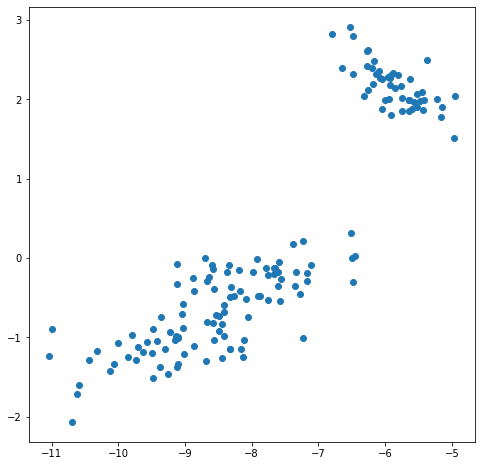

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 576x576 with 1 Axes>

In [5]:
## d) Trực quan hóa dữ liệu sau khi giảm chiều, có luôn cột 5 (species)
##    - Cột thứ 5 (species) chứa các giá trị: setosa, versicolor, virginica
## T_s1 = U.S = U.S.VT.V = X.V = T_s2
T_s1 = U.dot(S)
T_s1[0:5]

T_s2 = X.dot(VT.T)
T_s2[0:5]

## Visualization
## T_s2 có 2 columns, đặt tên là comp1, comp2
T_s2.columns = ["comp1", "comp2"]
## Bổ sung cột [iris.species] vào T_s2 --> T_s2(comp1, comp2, species)
T_s2["species"] = iris['species']

print('         - U.S', T_s2.shape, ': \n', U)
T_s2.head()

plt.figure(figsize=(8, 8))
plt.scatter(T_s2["comp1"], T_s2["comp2"])
plt.show()

plt.figure(figsize=(8, 8))
sns.scatterplot(x="comp1", y="comp2", data=T_s2, hue="species")
plt.show()
